1. Install Required Libraries

In [ ]:
%pip install numpy pandas scikit-learn matplotlib


2. Load Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


3. Load the Dataset

In [ ]:

file_path = r"C:\Users\User\Desktop\Data analytics assignments\Clustering SEE\gsalc.csv"


df = pd.read_csv(file_path)


print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 9002 entries, ethanol to 3.9315.54
dtypes: float64(9000), object(2)
memory usage: 6.1+ MB
None


,ethanol,100ppb,0.3565,0.3345,0.3575,0.333,0.3565.1,0.3345.1,0.3565.2,0.3355,...,3.93.74,3.929.105,3.929.106,3.929.107,3.9315.53,3.935.12,3.9275.108,3.93.75,3.9325.24,3.9315.54
0,ethanol,100ppb,0.3525,0.3305,0.3525,0.3320,0.3550,0.3305,0.3525,0.3280,...,3.9190,3.9190,3.9180,3.9180,3.9180,3.9180,3.9190,3.918,3.9180,3.9205
1,ethanol,100ppb,0.3550,0.3345,0.3540,0.3320,0.3550,0.3330,0.3550,0.3320,...,3.8815,3.8840,3.8800,3.8800,3.8840,3.8840,3.8815,3.884,3.8825,3.8815
2,ethanol,100ppb,0.3415,0.3220,0.3430,0.3210,0.3430,0.3235,0.3415,0.3210,...,3.9460,3.9485,3.9410,3.9470,3.9460,3.9425,3.9460,3.946,3.9460,3.9460
3,ethanol,100ppb,0.3500,0.3245,0.3465,0.3320,0.3455,0.3245,0.3490,0.3235,...,3.9375,3.9400,3.9385,3.9375,3.9375,3.9365,3.9400,3.940,3.9365,3.9365
4,ethanol,200ppb,0.3380,0.3220,0.3365,0.3345,0.3380,0.3365,0.3380,0.3210,...,3.8730,3.8705,3.8715,3.8715,3.8730,3.8705,3.8715,3.874,3.8680,3.8730


4. Clean & Preprocess the Data meow

In [ ]:

df_cleaned = df.iloc[:, :10].copy()

df_cleaned.columns = ['Gas_Type', 'Concentration'] + [f'Sensor_{i}' for i in range(1, df_cleaned.shape[1] - 1)]

df_cleaned['Concentration'] = df_cleaned['Concentration'].str.replace('ppb', '').astype(float)

df_cleaned.insert(0, 'Time', range(1, len(df_cleaned) + 1))

df_cleaned.head()


,Time,Gas_Type,Concentration,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8
0,1,ethanol,100.0,0.3525,0.3305,0.3525,0.3320,0.3550,0.3305,0.3525,0.3280
1,2,ethanol,100.0,0.3550,0.3345,0.3540,0.3320,0.3550,0.3330,0.3550,0.3320
2,3,ethanol,100.0,0.3415,0.3220,0.3430,0.3210,0.3430,0.3235,0.3415,0.3210
3,4,ethanol,100.0,0.3500,0.3245,0.3465,0.3320,0.3455,0.3245,0.3490,0.3235
4,5,ethanol,200.0,0.3380,0.3220,0.3365,0.3345,0.3380,0.3365,0.3380,0.3210


5. Compute Sensor Change Over Time

In [ ]:

sensor_columns = df_cleaned.columns[3:]  
df_cleaned['Sensor_Change'] = df_cleaned[sensor_columns].diff().abs().mean(axis=1)

df_cluster = df_cleaned.dropna().copy()

df_cluster.head()


,Time,Gas_Type,Concentration,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_Change
1,2,ethanol,100.0,0.3550,0.3345,0.3540,0.3320,0.3550,0.3330,0.3550,0.3320,0.002125
2,3,ethanol,100.0,0.3415,0.3220,0.3430,0.3210,0.3430,0.3235,0.3415,0.3210,0.011750
3,4,ethanol,100.0,0.3500,0.3245,0.3465,0.3320,0.3455,0.3245,0.3490,0.3235,0.004875
4,5,ethanol,200.0,0.3380,0.3220,0.3365,0.3345,0.3380,0.3365,0.3380,0.3210,0.007500
5,6,ethanol,200.0,0.3405,0.3405,0.3415,0.3260,0.3405,0.3210,0.3380,0.3235,0.006875


6. Normalize the Sensor Change Data

In [ ]:

scaler = StandardScaler()
df_cluster['Sensor_Change_Scaled'] = scaler.fit_transform(df_cluster[['Sensor_Change']])


7. Apply SEE (K-Means Clustering)

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters as an assumption
df_cluster['SEE_Cluster'] = kmeans.fit_predict(df_cluster[['Sensor_Change_Scaled']])


8. Apply Alternative Clustering (Gaussian Mixture Model - GMM)

In [ ]:

gmm = GaussianMixture(n_components=3, random_state=42)
df_cluster['GMM_Cluster'] = gmm.fit_predict(df_cluster[['Sensor_Change_Scaled']])


9. Cluster Results

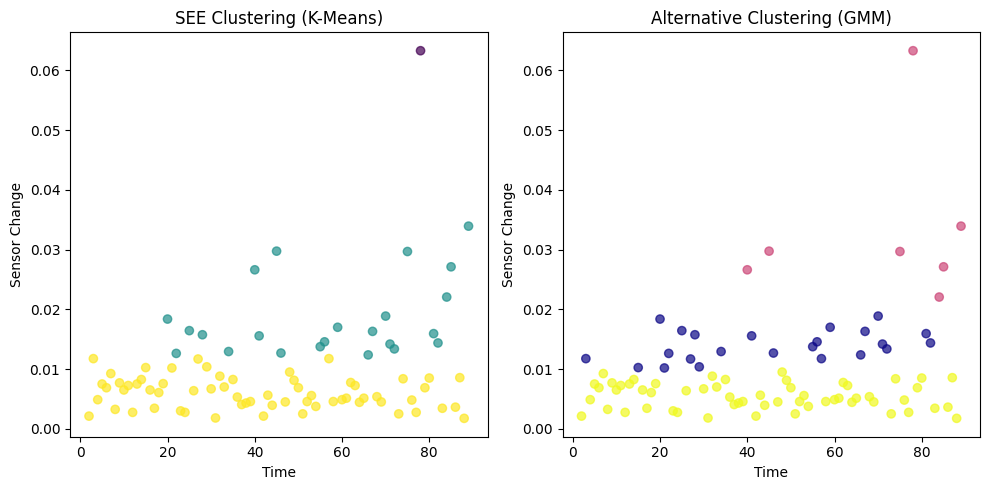

In [ ]:
# Plot clustering results
plt.figure(figsize=(10, 5))

# SEE Clustering (K-Means)
plt.subplot(1, 2, 1)
plt.scatter(df_cluster['Time'], df_cluster['Sensor_Change'], c=df_cluster['SEE_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Sensor Change")
plt.title("SEE Clustering (K-Means)")

# GMM Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_cluster['Time'], df_cluster['Sensor_Change'], c=df_cluster['GMM_Cluster'], cmap='plasma', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Sensor Change")
plt.title("Alternative Clustering (GMM)")

plt.tight_layout()
plt.show()


10. Compare Clustering Performance

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for both clustering methods
see_silhouette = silhouette_score(df_cluster[['Sensor_Change_Scaled']], df_cluster['SEE_Cluster'])
gmm_silhouette = silhouette_score(df_cluster[['Sensor_Change_Scaled']], df_cluster['GMM_Cluster'])

print(f"Silhouette Score - SEE (K-Means): {see_silhouette:.4f}")
print(f"Silhouette Score - GMM: {gmm_silhouette:.4f}")


Silhouette Score - SEE (K-Means): 0.6417
Silhouette Score - GMM: 0.6326
